### 1) Brent's Method

https://mathworld.wolfram.com/BrentsMethod.html

Given three points $x_1$, $x_2$, and $x_3$, Brent's method fits $x$ as a quadratic function of $y$, then uses the interpolation formula

\begin{equation}
x = \frac{[y-f(x_1)][y-f(x_2)]x_3}{[f(x_3)-f(x_1)][f(x_3)-f(x_2)]}+\frac{[y-f(x_2)][y-f(x_3)]x_1}{[f(x_1)-f(x_2)][f(x_1)-f(x_3)]}+\frac{[y-f(x_3)][y-f(x_1)]x_2}{[f(x_2)-f(x_3)][f(x_2)-f(x_1)]}
\end{equation}

Brent's method can be used for root finding or applied to minimization.

For minimization:
https://en.wikipedia.org/wiki/Brent%27s_method

### Brent minimization pseudocode

Below I write pseudocode that does Brent's method for minimization, except I use bisection a la Wikipedia article above.

Be careful of this Wikipedia article because the code is incorrect and overly complicated in it!!

In your homework, you'll want to replace the bisection method used below as the fallback method with the golden mean search method. 

See the class notes for how to do the golden mean search. 


def Brent(f, a, b, delta = 1e-7):

    if |f(a)|<|f(b)|:
    
        swap a and b
        
    c = a
    
    flag = True # denotes whether bisection (you'll want to replace this with golden mean search!) is used
    
    while |a-b|<delta:
    
        s = s_quad_interp(a,b,c)
        
        if any of the following conditions are true:
        
        Condition 1: s >= b # s is outside of bracket: then resort to bisection
        
        Condition 2: flag = True and |s-b| >= |b-c| # |b-c| is size of previous step, bisection was previous step
        
        Condition 3: flag = False and |s-b| >= |c-d| # previous step not bisection and step before the previous step is larger smaller than the current step
                                                     
        then resort to bisection minimization: # you'll want to replace this with golden mean search!
        
            s = (a+b)/2
            
            flag = True # we used bisection
            
        else: # keep the Brent estimate
        
            flag = False # we used Brent 
            
        # now iterate
        
        d = c
        
        c = b 
        
        a = s
        
        if |f(a)|<|f(b)|: # again swap a and b if needed
        
            swap a and b
            
    return b # return the minimum

minimum = 1.0000000149011612


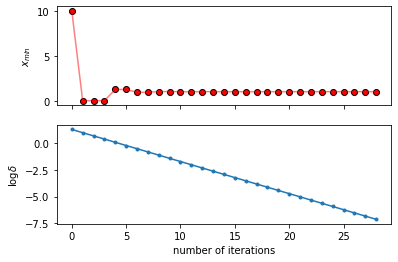

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
Example of brent minimization using bisection as the fall back method.
For PS7 problem 1, you'll want to use Golden Mean Search instead of bisection and clean this code up!
"""
f = lambda x: (x-1)**2 

def s_quad_interp(a, b, c):
    """
    inverse quadratic interpolation
    """
    epsilon = 1e-7 #for numerical stability
    s0 = a*f(b)*f(c) / (epsilon + (f(a)-f(b))*(f(a)-f(c)))
    s1 = b*f(a)*f(c) / (epsilon + (f(b)-f(a))*(f(b)-f(c)))
    s2 = c*f(a)*f(b) / (epsilon + (f(c)-f(a))*(f(c)-f(b)))
    return s0+s1+s2

def optimize():
    #define interval
    a = -10 
    b = 10
    tol = 1e-7
    if abs(f(a)) < abs(f(b)):
        a, b = b, a #swap bounds
    c = a
    flag = True
    err = abs(b-a)
    err_list, b_list = [err], [b]
    while err > tol:
        s = s_quad_interp(a,b,c)
        if ((s >= b))\
            or ((flag == True) and (abs(s-b) >= abs(b-c)))\
            or ((flag == False) and (abs(s-b) >= abs(c-d))):
            s = (a+b)/2 #bisection
            flag = True
        else:
            flag = False
        c, d = b, c # d is c from previous step
        #if f(a)*f(s) < 0:
        #    b = s
        #else:
        a = s
        if abs(f(a)) < abs(f(b)):
            a, b = b, a #swap if needed
        err = abs(b-a) #update error to check for convergence
        err_list.append(err)
        b_list.append(b)
    print(f'minimum = {b}')
    return b_list, err_list

def plot(b_list, err_list):
    log_err = [np.log10(err) for err in err_list]
    fig, axs = plt.subplots(2,1, sharex=True)
    ax0, ax1 = axs[0], axs[1]
    #plot root
    ax0.scatter(range(len(b_list)), b_list, marker = 'o', facecolor = 'red', edgecolor = 'k')
    ax0.plot(range(len(b_list)), b_list, 'r-', alpha = .5)
    ax1.plot(range(len(err_list)), log_err,'.-')
    ax1.set_xlabel('number of iterations')
    ax0.set_ylabel(r'$x_{min}$')
    ax1.set_ylabel(r'$\log{\delta}$')
    plt.savefig('convergence.png')
    
if __name__ == "__main__":
    b_list, err_list = optimize()
    plot(b_list, err_list)

### 2) Logistic function minimization

The probability of observing response $y_i$ given parameters $\beta_0$ and $\beta_1$ and age $x_i$ is
\begin{equation}
p(y_i|\beta_0, \beta_1) = 1/(1+\exp(-\beta_0+\beta_1 x_i)) 
\end{equation}

Let's plot this function:

In [2]:
"""
To install CPU Jax:
pip install --upgrade pip
pip install --upgrade "jax[cpu]"

I won't be using it in this notebook!
"""

'\nTo install CPU Jax:\npip install --upgrade pip\npip install --upgrade "jax[cpu]"\n\nI won\'t be using it in this notebook!\n'

In [3]:
def p(x, beta_0, beta_1):
    return 1/(1+np.exp(-(beta_0+beta_1*x)))

In [4]:
x = 50

<ipython-input-5-e217fb70cd4f>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, p_grid)


Text(0.5, 1.0, '$p(y_i|x_i=50,\\beta_0, \\beta_1)$')

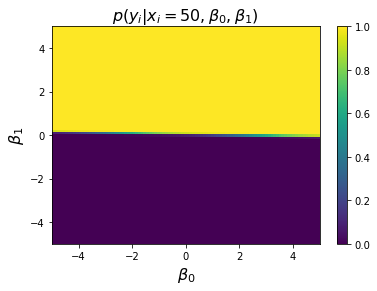

In [5]:
beta_0 = np.linspace(-5,5, 100)
beta_1 = np.linspace(-5,5,100)
beta = np.meshgrid(beta_0, beta_1)
p_grid = p(x, *beta)
plt.pcolormesh(*beta, p_grid)
plt.colorbar()
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$p(y_i|x_i=50,\beta_0, \beta_1)$', fontsize = 16)

Okay, now let's calculate the log likelihood of observing the data that the problem gives us given our parameters $\beta_0$ and $\beta_1$. Load it in:


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('survey.csv')  

In [8]:
data

,age,recognized_it
0,45.755371,0.0
1,25.877705,0.0
2,36.838818,0.0
3,68.358208,1.0
4,5.353914,0.0
...,...,...
95,54.420506,0.0
96,24.069313,0.0
97,53.082596,0.0
98,20.009270,0.0


In [9]:
p_grid.shape

(100, 100)

In [10]:
# send data to numpy bc pandas annoys me
xs = data['age'].to_numpy()
ys = data['recognized_it'].to_numpy()
x_sort = np.argsort(xs)
xs = xs[x_sort]
ys = ys[x_sort]

Now compute the log likelihood of observing the data given parameters $\beta_0$ and $\beta_1$.

See https://web.stanford.edu/class/archive/stats/stats200/stats200.1172/Lecture26.pdf for a good overview of logistic regression, which is what we are doing!

The logistic regression model assumes each response $y_i$ is a Bernoulli distributed independent variable. 
Here, "Bernoulli distributed" means each response $y_i$ has probability
\begin{equation}
p(y_i|\beta_0, \beta_1, x_i) = 1/(1+\exp(-\beta_0+\beta_1 x_i))  = p_i
\end{equation}

The likelihood for this logistic regression model is given by
\begin{equation}
L(\beta_0, \beta_1) = \prod_{i=0}^N p_i^{y_i}(1-p_i)^{(1-y_i)}
\end{equation}

Then the log likelihood can be written as (after a bit of math!)

\begin{equation}
\mathcal{L}(\beta_0, \beta_1)  = \sum_{i=0}^N \left(y_i \log\left(\frac{p_i}{1-p_i}\right)+\log(1-p_i)\right)
\end{equation}

Below I implement the log likelihood and plot it for various values of $\beta_0$ and $\beta_1$.

In [11]:
def log_likelihood(beta, xs, ys):
    beta_0 = beta[0]
    beta_1 = beta[1]
    epsilon = 1e-16
    l_list = [ys[i]*np.log(p(xs[i], beta_0, beta_1)/(1-p(xs[i], beta_0, beta_1)+epsilon)) 
              + np.log(1-p(xs[i], beta_0, beta_1)+epsilon) for i in range(len(xs))]
    ll = np.sum(np.array(l_list), axis = -1)
    return -ll # return log likelihood

<ipython-input-12-4da41ad57997>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, ll)


Text(0.5, 1.0, '$\\mathcal{L}(\\beta_0, \\beta_1)$')

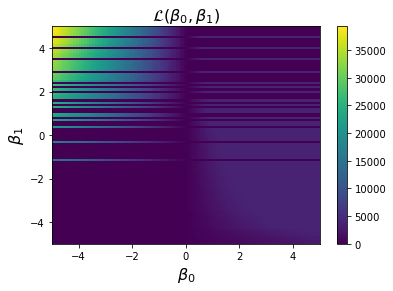

In [12]:
ll = log_likelihood(beta, xs, ys)
plt.pcolormesh(*beta, ll)
plt.colorbar()
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$\mathcal{L}(\beta_0, \beta_1)$', fontsize = 16)

To find the optimal parameters $\hat{\beta_0}, \hat{\beta_1}$ that maximize the log likelihood, you'll want to take the gradient of $\mathcal{L}(\beta_0, \beta_1)$ and find where it is 0.

You could try to use a root finder to do this on the gradient of the negative log likelihood, or you could use scipy.optimize.minimize on the negative log likelihood (NOT its gradient!)

I recommend the latter option. Below I provide an example of how to use scipy optimize.minimize to get optimal parameters, their covariance matrix, and their associated errors. See https://stackoverflow.com/questions/40187517/getting-covariance-matrix-of-fitted-parameters-from-scipy-optimize-least-squares

In [13]:
# example of using scipy optimize.minimize to perform a linear least squares fit

from scipy import optimize

#True parameters
def f( x, p):
    return p[0]*x + 0.4*np.sin(p[1]*x)
p = np.array([1, 40])

print('True p: ', p)

#Generate random data
xdata = np.linspace(0., 1, 120)
ydata = f(xdata, p) +  np.random.normal(0., 0.2, len(xdata))

#Fits
pstart = [1,42]
errFunc = lambda p, x, y: f(x,p) - y

# Covariance matrix of parameters
def Covariance(hess_inv, resVariance):
    return hess_inv * resVariance

#Error of parameters
def error(hess_inv, resVariance):
    covariance = Covariance(hess_inv, resVariance)
    return np.sqrt( np.diag( covariance ))

result = optimize.minimize(lambda p,x,y: np.sum( errFunc(p,x,y)**2 ), pstart,  args=(xdata, ydata))
hess_inv = result.hess_inv # inverse of hessian matrix
var = result.fun/(len(ydata)-len(pstart)) 
dFit = error( hess_inv,  var)
print('Optimal parameters and error:\n\tp: ' , result.x, '\n\tdp: ', dFit)
print('Covariance matrix of optimal parameters:\n\tC: ' , Covariance( hess_inv,  var))

True p:  [ 1 40]
Optimal parameters and error:
	p:  [ 1.01742667 39.86857218] 
	dp:  [0.02134643 0.07906688]
Covariance matrix of optimal parameters:
	C:  [[ 0.00045567 -0.00011485]
 [-0.00011485  0.00625157]]


The above code, when applied appropriately to the log likelihood, will give you all you need to answer problem 2.

For those who want to try to find the roots of the gradient of the log likelihood to do the optimization, read on below. 

Now I'll show how to calculate the components of the gradient of the log likelihood (note that you'll want to do this on the negative log likelihood):

In [14]:
grad_ll_arr = np.gradient(ll)

<ipython-input-15-c7fefb2a7362>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, grad_ll_arr[0])


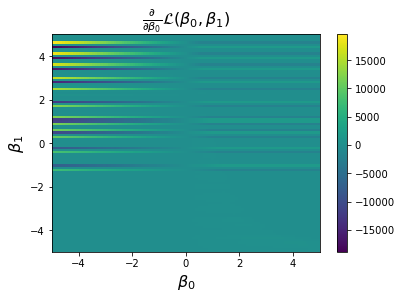

In [15]:
plt.pcolormesh(*beta, grad_ll_arr[0])
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$\frac{\partial}{\partial \beta_0} \mathcal{L}(\beta_0, \beta_1)$', fontsize = 16)
plt.colorbar()

<ipython-input-16-91ace771fc20>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, grad_ll_arr[1])


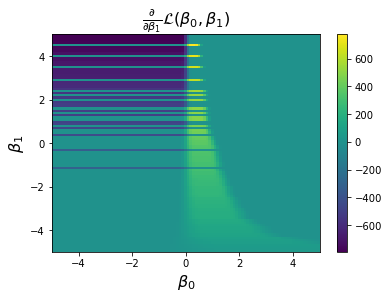

In [16]:
plt.pcolormesh(*beta, grad_ll_arr[1])
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$\frac{\partial}{\partial \beta_1} \mathcal{L}(\beta_0, \beta_1)$', fontsize = 16)
plt.colorbar()

Finally, let's compute the hessian of the log likelihood. We can use the hessian to find the covariance matrix of the optimal parameters 

In [17]:
# Let's compute the hessian!

def hessian(x):
    """
    https://stackoverflow.com/questions/31206443/numpy-second-derivative-of-a-ndimensional-array
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

In [18]:
hess_ll = hessian(ll)

In [19]:
hess_ll.shape

(2, 2, 100, 100)

<ipython-input-20-7468fc3083dd>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, hess_ll[0, 0, :, :])


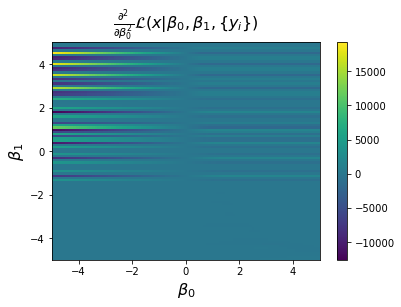

In [20]:
plt.pcolormesh(*beta, hess_ll[0, 0, :, :])
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$\frac{\partial^2}{\partial \beta_0^2} \mathcal{L}(x|\beta_0, \beta_1, \{y_i\})$', fontsize = 16)
plt.colorbar()

<ipython-input-21-ba60dcc01144>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(*beta, hess_ll[1, 1, :, :])


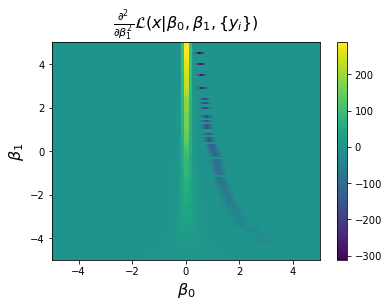

In [21]:
plt.pcolormesh(*beta, hess_ll[1, 1, :, :])
plt.xlabel(r'$\beta_0$', fontsize = 16)
plt.ylabel(r'$\beta_1$', fontsize = 16)
plt.title(r'$\frac{\partial^2}{\partial \beta_1^2} \mathcal{L}(x|\beta_0, \beta_1, \{y_i\})$', fontsize = 16)
plt.colorbar()

Okay, now we need to find the covariance matrix for our parameters $\beta_0$ and $\beta_1$.

You can do this with the following:

Let our model parameters be represented by the vector $\theta = (\beta_0, \beta_1)$.

Then the Hessian is given by 
\begin{equation}
H(\theta)=\frac{\partial^2}{\partial \theta_i \partial \theta_j} \mathcal{L}(\theta)
\end{equation}

and so the covariance matrix of the optimal parameters $\hat{\theta}$ is given by
\begin{equation}
C(\hat{\theta})=[H(\hat{\theta)}]^{-1}
\end{equation}

The error in each optimal parameter is given by
\begin{equation}
\sigma_j = \sqrt{C_{jj}}
\end{equation}

I might be off by a constant in this...